# INCREDIBLY SNAPPY TITLE
**_And a witty subtitle_**
### Data Science 410 BB
#### University of Washington Professional & Continuing Education
#### Homework 4: Hypothesis Testing
#### Leo Salemann, 2/1/18


# Compare and test Normality 
The distributions of price and log price – Use both a graphical method and a formal test. Hint: Remember these relationships will always be approximate.

In [1]:
read.auto = function(file = '../../../DataScience410/Lecture1/Automobile price data _Raw_.csv'){
  ## Read the csv file
  auto.price <- read.csv(file, header = TRUE, 
                      stringsAsFactors = FALSE)

  ## Coerce some character columns to numeric
  numcols <- c('price', 'bore', 'stroke', 'horsepower', 'peak.rpm')
  auto.price[, numcols] <- lapply(auto.price[, numcols], as.numeric)

  ## Remove cases or rows with missing values. In this case we keep the 
  ## rows which do not have nas. 
  auto.price[complete.cases(auto.price), ]
}
auto.price = read.auto()
str(auto.price)

Warning message in lapply(auto.price[, numcols], as.numeric):
“NAs introduced by coercion”Warning message in lapply(auto.price[, numcols], as.numeric):
“NAs introduced by coercion”Warning message in lapply(auto.price[, numcols], as.numeric):
“NAs introduced by coercion”Warning message in lapply(auto.price[, numcols], as.numeric):
“NAs introduced by coercion”Warning message in lapply(auto.price[, numcols], as.numeric):
“NAs introduced by coercion”

'data.frame':	195 obs. of  26 variables:
 $ symboling        : int  3 3 1 2 2 2 1 1 1 2 ...
 $ normalized.losses: chr  "?" "?" "?" "164" ...
 $ make             : chr  "alfa-romero" "alfa-romero" "alfa-romero" "audi" ...
 $ fuel.type        : chr  "gas" "gas" "gas" "gas" ...
 $ aspiration       : chr  "std" "std" "std" "std" ...
 $ num.of.doors     : chr  "two" "two" "two" "four" ...
 $ body.style       : chr  "convertible" "convertible" "hatchback" "sedan" ...
 $ drive.wheels     : chr  "rwd" "rwd" "rwd" "fwd" ...
 $ engine.location  : chr  "front" "front" "front" "front" ...
 $ wheel.base       : num  88.6 88.6 94.5 99.8 99.4 ...
 $ length           : num  169 169 171 177 177 ...
 $ width            : num  64.1 64.1 65.5 66.2 66.4 66.3 71.4 71.4 71.4 64.8 ...
 $ height           : num  48.8 48.8 52.4 54.3 54.3 53.1 55.7 55.7 55.9 54.3 ...
 $ curb.weight      : int  2548 2548 2823 2337 2824 2507 2844 2954 3086 2395 ...
 $ engine.type      : chr  "dohc" "dohc" "ohcv" "ohc" ...
 $ num.o

## Q-Q plot of Auto Price and its natural log

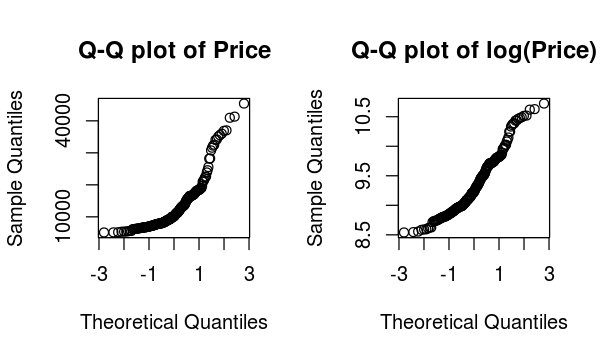

In [10]:
options(repr.plot.width=5, repr.plot.height=3)

# Visual test of normality
par(mfrow = c(1, 2))
qqnorm(auto.price$price, main = 'Q-Q plot of Price')
qqnorm(log(auto.price$price), main = 'Q-Q plot of log(Price)')
par(mfrow = c(1, 1))

Log is closer to normal (e.g. a straight line) than non-Log.

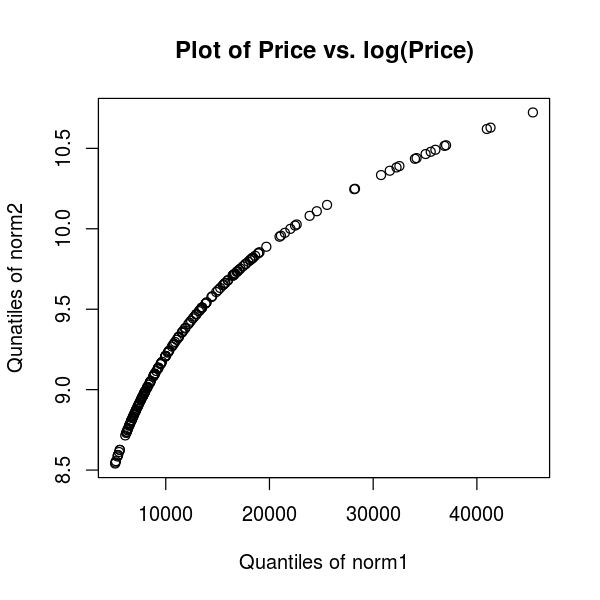

In [16]:
# can't see abline, probably punt on this.

options(repr.plot.width=5, repr.plot.height=5)

## Or, plot one distribution against another.
plot(sort(auto.price$price), sort(log(auto.price$price)),
     main = 'Plot of Price vs. log(Price)', 
     xlab = 'Quantiles of norm1', ylab = 'Qunatiles of norm2')
abline(a = 0.0, b = 1.0, lty = 2, col = 'blue')

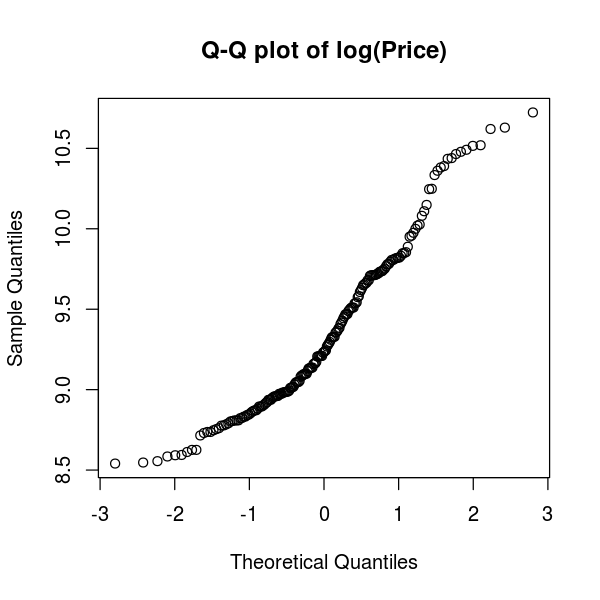

In [13]:
options(repr.plot.width=5, repr.plot.height=5)

# Visual test of normality
qqnorm(log(auto.price$price), main = 'Q-Q plot of log(Price)')
abline(a = 0.0, b = 1.0, lty = 2, col = 'blue')

# VVVVVVVVV JUNK VVVVVVVVVVV

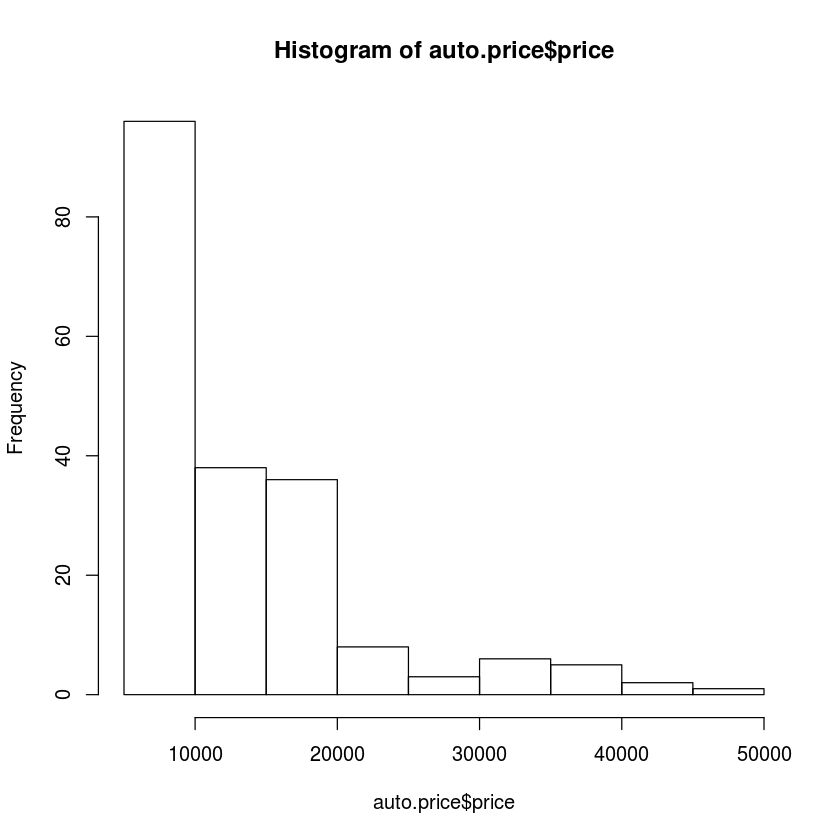

In [2]:
hist(auto.price$price)

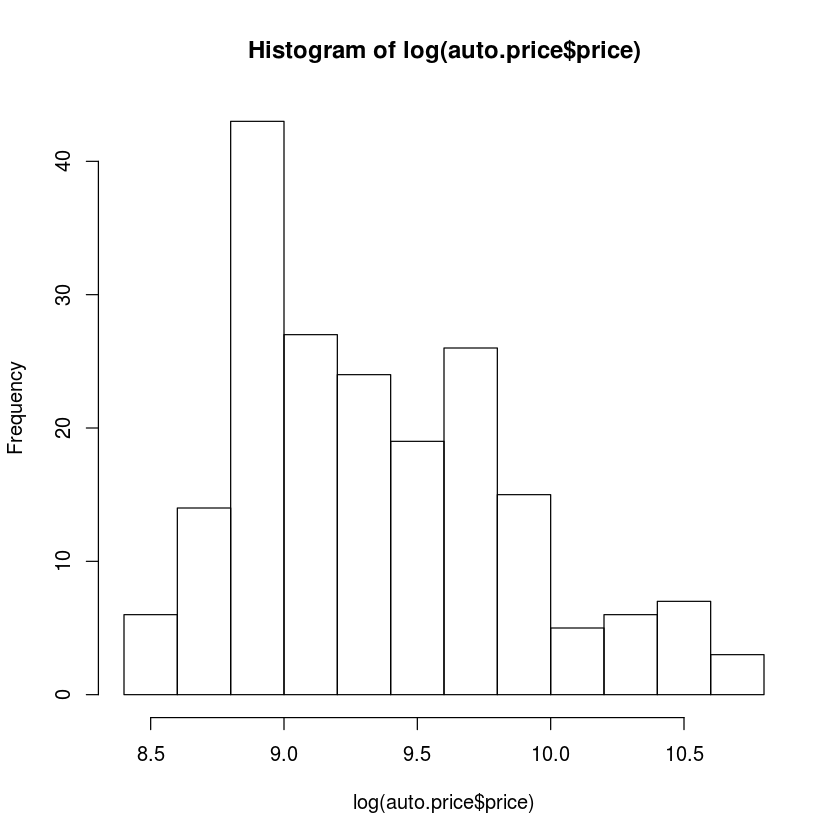

In [3]:
hist(log(auto.price$price))


In [4]:
require("dplyr")
library(dpylyr)
pop_A = select(filter(autos.price, ))
pop_B = rnorm(25, mean=153, sd = 4)

Loading required package: dplyr

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



ERROR: Error in library(dpylyr): there is no package called ‘dpylyr’


In [5]:
set.seed(1234)
pop_A = rnorm(25, mean=150, sd = 7)
pop_B = rnorm(25, mean=153, sd = 4)

In [11]:
pop_A = auto.price$price
pop_B = log(auto.price$price)

In [5]:
# this works
pop_A = scale(auto.price$price)
pop_B = scale(log(auto.price$price))

In [24]:

pop_A = data.Normalization(auto.price$price)
pop_B = normalize(log(auto.price$price))

ERROR: Error in eval(expr, envir, enclos): could not find function "data.Normalization"


In [31]:
# from https://vitalflux.com/data-science-scale-normalize-numeric-data-using-r/

normalize = function(x) {
    return ((x - min(x)) / (max(x) - min(x)))
}

In [35]:

# from https://vitalflux.com/data-science-scale-normalize-numeric-data-using-r/
# dfNorm =  as.data.frame(lapply(df, normalize))

pop_A = as.data.frame(lapply(auto.price$price, normalize))
pop_B = as.data.frame(lapply(log(auto.price$price), normalize))
pop_A

NaN.,NaN..1,NaN..2,NaN..3,NaN..4,NaN..5,NaN..6,NaN..7,NaN..8,NaN..9,⋯,NaN..185,NaN..186,NaN..187,NaN..188,NaN..189,NaN..190,NaN..191,NaN..192,NaN..193,NaN..194
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,⋯,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
normalize(matrix(1:9,nrow=3))

ERROR: Error in eval(expr, envir, enclos): could not find function "normalize"


In [34]:

pop_A = dfNorm(auto.price$price)
pop_B = dfNorm(log(auto.price$price))
pop_A

ERROR: Error in eval(expr, envir, enclos): could not find function "dfNorm"


Loading required package: repr


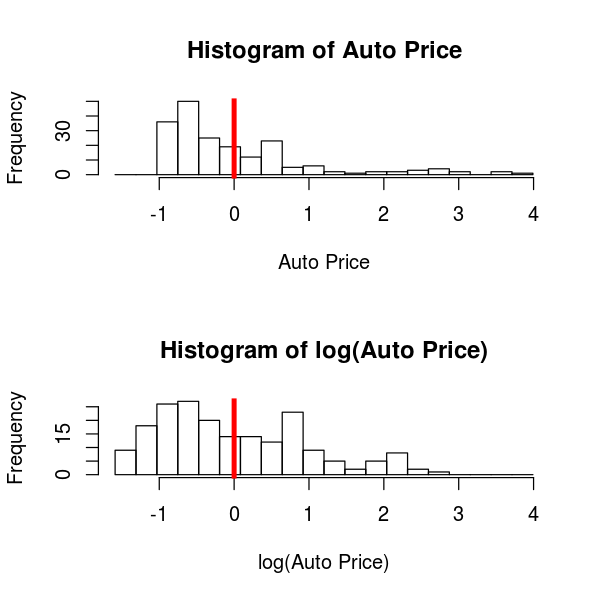

In [6]:
require(repr)
options(repr.plot.width=5, repr.plot.height=5) ## Set the plot area.

plot.t <- function(a, b, cols = c('Auto Price', 'log(Auto Price)'), nbins = 20){
  maxs = max(c(max(a), max(b)))
  mins = min(c(min(a), min(b)))
  breaks = seq(maxs, mins, length.out = (nbins + 1))
  par(mfrow = c(2, 1))
  hist(a, breaks = breaks, main = paste('Histogram of', cols[1]), xlab = cols[1])
  abline(v = mean(a), lwd = 4, col = 'red')
  hist(b, breaks = breaks, main = paste('Histogram of', cols[2]), xlab = cols[2])
  abline(v = mean(b), lwd = 4, col = 'red')
  par(mfrow = c(1, 1))
}
plot.t(pop_A, pop_B)

# Test significance of price (log price) 
Stratified by 
a) fuel type
b) aspiration 
c) rear vs. front wheel drive. Use both graphical methods and the formal test.

# Apply ANOVA and Tukey's HSD test 
to the auto price data to compare the price (or log price if closer to a Normal distribution) of autos stratified by body style.

# Graphically explore the differences between the price
conditioned by the categories of each variable – Hint: Make sure you have enough data for each category and drop categories with insufficient data.

# Use standard ANOVA and Tukey HSD 
to test the differences of these groups.